# 05/24/22 - Playing with the Osipkov-Merritt profile.

In [3]:
################################################################

# import general libraries and modules
import numpy as np
np.set_printoptions(threshold=10000)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
import pandas as pd
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
warnings.filterwarnings( "ignore", module = "plotbin\..*" )
from os import path


# JAM-time! Start with assigning beta_k to each Gaussian with Osipkov-Merritt profile

$$Beta(r) = \frac{r^2}{r_{ani}^2 + r^)} = \frac{1}{a_{ani}^2 (r_{eff}/r)^2 + 1}$$
$$a_{ani} = r_{ani} / r_{eff}$$

For r << r_ani, Beta ~ 0
For r >> r_ani, Beta ~ 1


In [4]:
# define function for assigning beta

def osipkov_merritt_model (r, a_ani, r_eff):
    
    '''
    Given anisotropy scale factor (?) and effective radius, caluclates the anisotropy at the given radius r.
    Inputs:
        r - radius for calculation (must have same units as r_eff)
        a_ani - (r_ani/r_eff) ratio of anisotropy radius and effective radius
        r_eff - effective radius of galaxy (must have same units as r_eff
    Outputs:
        Beta - anisotropy at given radius
    '''
    
    Beta = 1 / (a_ani**2 * (r_eff/r)**2 + 1)
    
    return Beta

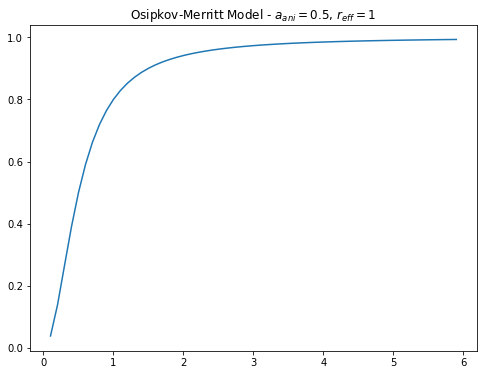

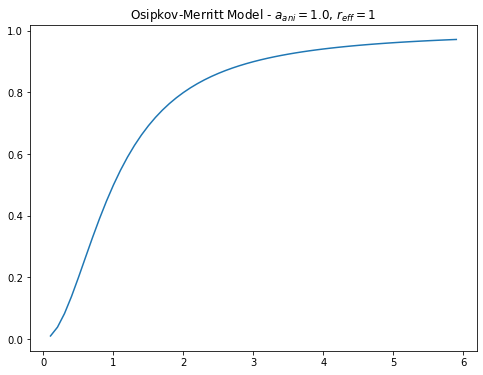

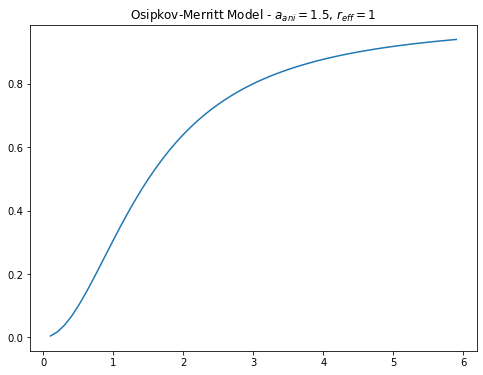

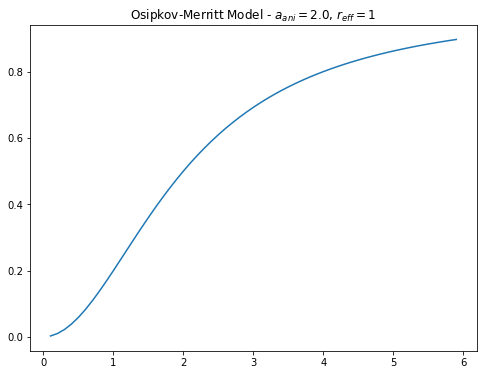

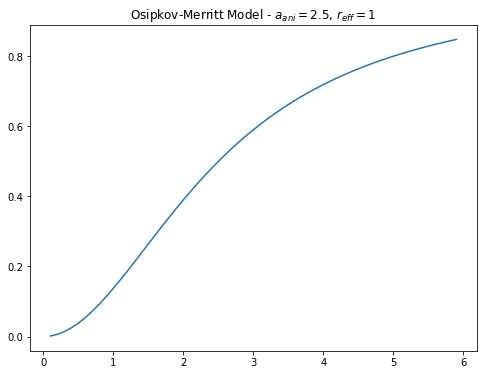

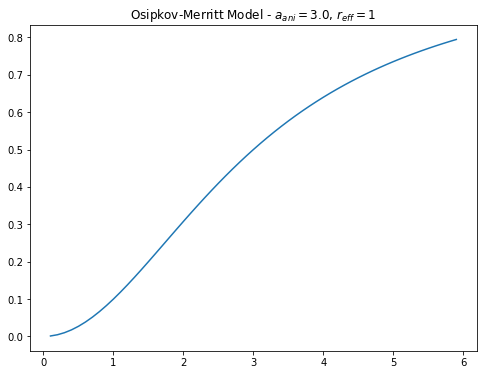

In [6]:
a_ani = np.arange(0.5, 3.5, 0.5)
r_eff = 1
R = np.arange(0.1, 6.0, 0.1)
Beta = np.zeros(len(R))


for a_ani in a_ani:
    
    for i in range(len(R)):
        r = R[i]
        Beta[i] = osipkov_merritt_model(r, a_ani, r_eff)
        
    plt.clf()
    plt.plot(R, Beta)
    plt.title('Osipkov-Merritt Model - '+r'$a_{ani}=$'+f'{a_ani}, '+r'$r_{eff}=$'+f'{r_eff}') 
    plt.pause(1)

# Looks right!